In [1]:
# Instal kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# configute the API
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

# Configure the Kaggle API using your credentials
api = KaggleApi()
#api.authenticate()


In [4]:
# create new kaggle directory
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

In [5]:
# authenticate kaggle api
api.authenticate()

In [7]:
os.getcwd()

'/content'

In [ ]:
# Set the competition and dataset details
competition = 'h-and-m-personalized-fashion-recommendations'
dataset = 'h-and-m-personalized-fashion-recommendations'

# Create a directory to store the data
data_dir = './content/data'
os.makedirs(data_dir, exist_ok=True)

# Download the dataset files
api.competition_download_files(competition, path=data_dir)

# Unzip the downloaded files
import zipfile

for file in os.listdir(data_dir):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(data_dir, file), 'r') as zip_ref:
            zip_ref.extractall(data_dir)

# Now you can access the dataset files in the specified directory


In [10]:
import pandas as pd

In [11]:
articles_df = pd.read_csv('/content/content/data/articles.csv')
articles_df.head()

#articles_df = pd.read_csv('articles.csv')
#articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [13]:
customers_df = pd.read_csv('/content/content/data/customers.csv')
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [15]:
print(articles_df.shape)
print(customers_df.shape)

(105542, 25)
(1371980, 7)


In [20]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Here, alot of products has missing product description

In [21]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [22]:
import matplotlib.pyplot as plt

<Axes: >

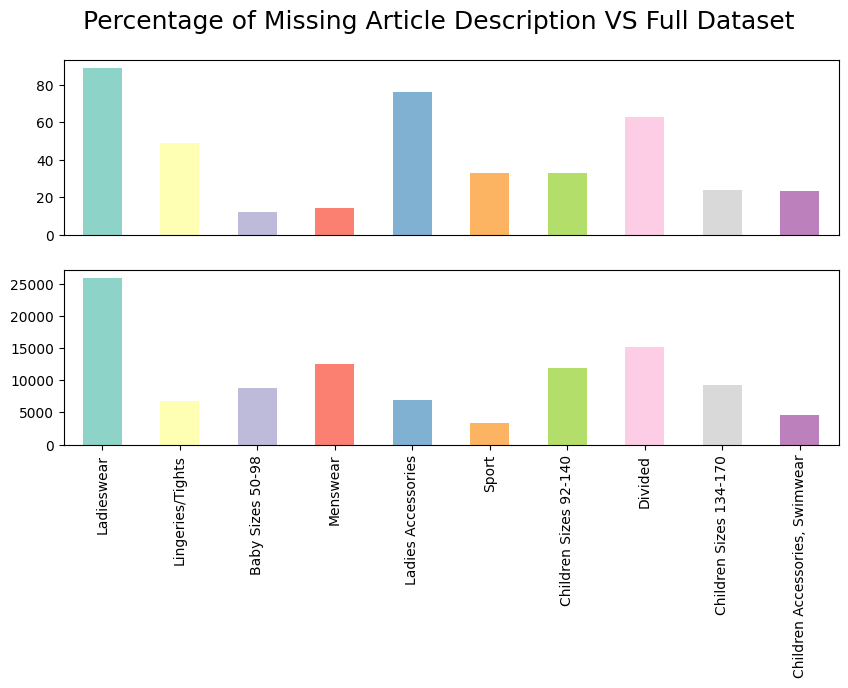

In [46]:
index_names = articles_df["index_name"].unique().tolist()

# Set the color palette
colors = plt.cm.Set3(range(len(index_names)))

# Defining two rows of subplots.
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle("Percentage of Missing Article Description VS Full Dataset", size = 18)

# Disabling the x axis labels for the upper plot.
x_axis = ax[0].axes.get_xaxis()
x_axis.set_visible(False)

# Plotting the histogram of the entries with Missing descriptions.
articles_df[articles_df["detail_desc"].isnull()
]["index_name"].value_counts().loc[index_names].plot(kind="bar", ax=ax[0], color = colors)

# Plotting the histogram of the index_names in the whole dataset.
articles_df["index_name"].value_counts().loc[index_names].plot(kind="bar", ax=ax[1], color = colors)

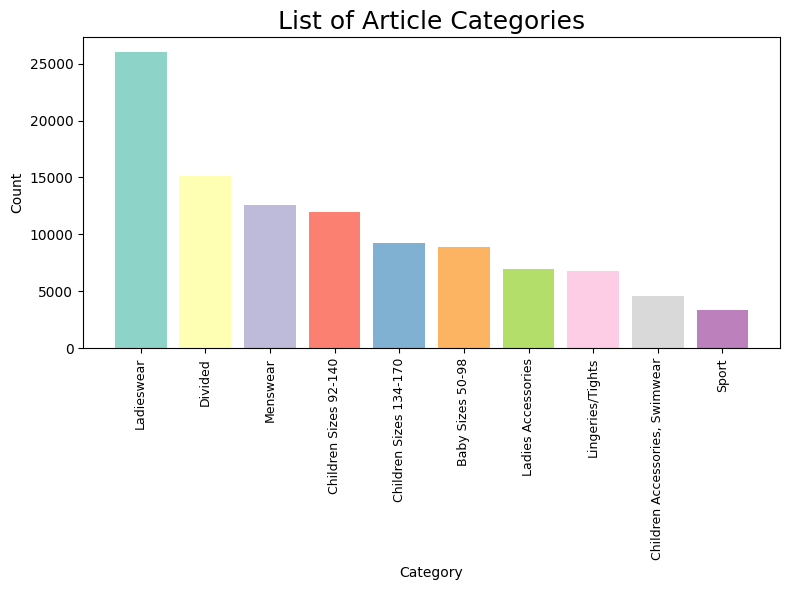

In [45]:
# Count the occurrences of each category
category_counts = articles_df['index_name'].value_counts()

# Sort the categories by count in descending order
sorted_categories = category_counts.sort_values(ascending=False).index

# Set the color palette
colors = plt.cm.Set3(range(len(sorted_categories)))

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(sorted_categories, category_counts, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('List of Article Categories', size = 18)

# Rotate x-axis labels
plt.xticks(rotation=90, size=9)
plt.tight_layout()
plt.show()


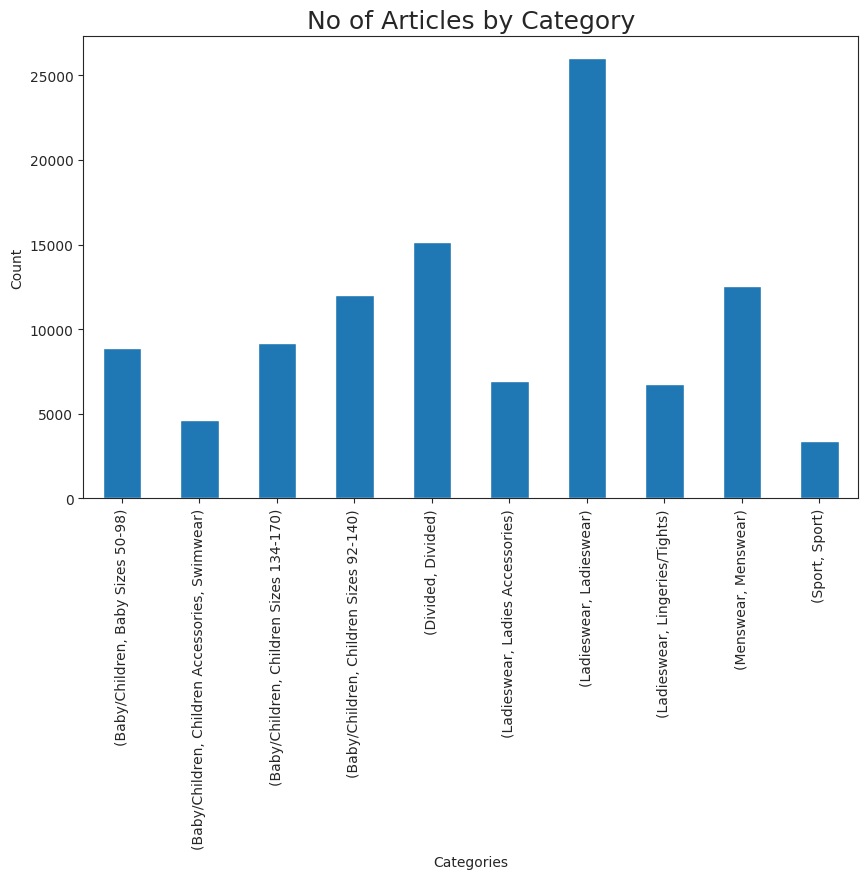

In [64]:
plt.figure(figsize=(10, 6))
non_zero_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('No of Articles by Category', size = 18)
#plt.xticks(rotation=45)
plt.show()

In [33]:
counts = articles_df.groupby(['index_group_name', 'index_name']).count()['article_id']
non_zero_counts = counts[counts > 0]
print(non_zero_counts)

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64


In [39]:
import plotly.graph_objects as go

# Data
labels = non_zero_counts.index
values = non_zero_counts.values

# Plot
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Pie Chart of Categories')

fig.show()


In [47]:
pd.options.display.max_rows = None

# Group by 'product_group_name' and 'product_type_name' and count 'article_id'
counts = articles_df.groupby(['product_group_name', 'product_type_name'])['article_id'].count()

# Sort within each main group
sorted_counts = counts.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

# Print the resulting counts
print(sorted_counts)

product_group_name     product_type_name       
Accessories            Hat/beanie                   1349
                       Bag                          1280
                       Earring                      1159
                       Other accessories            1034
                       Scarf                        1013
                       Hair/alice band               854
                       Sunglasses                    621
                       Necklace                      581
                       Cap/peaked                    573
                       Belt                          458
                       Hat/brim                      396
                       Gloves                        367
                       Hair clip                     244
                       Ring                          240
                       Hair string                   238
                       Bracelet                      180
                       Tie              

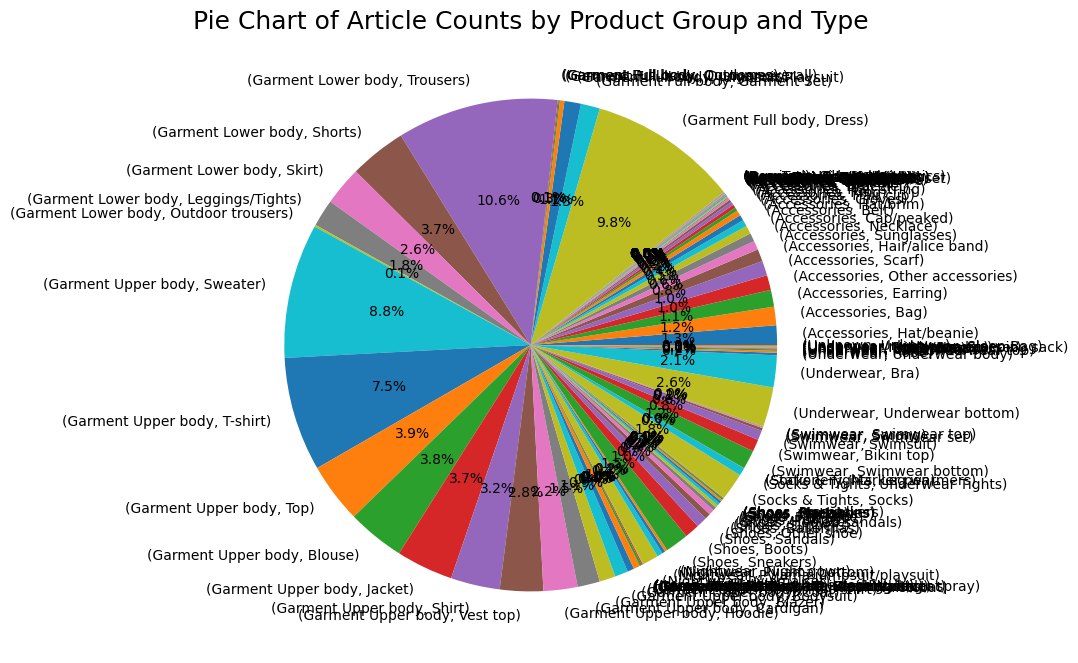

In [48]:

# Group by 'product_group_name' and 'product_type_name' and count 'article_id'
counts = articles_df.groupby(['product_group_name', 'product_type_name'])['article_id'].count()

# Sort within each main group
sorted_counts = counts.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

# Plot a pie chart
sorted_counts.plot.pie(figsize=(8, 8), autopct='%1.1f%%', ylabel='')

# Display the chart
plt.title('Pie Chart of Article Counts by Product Group and Type', size = 18)
plt.show()


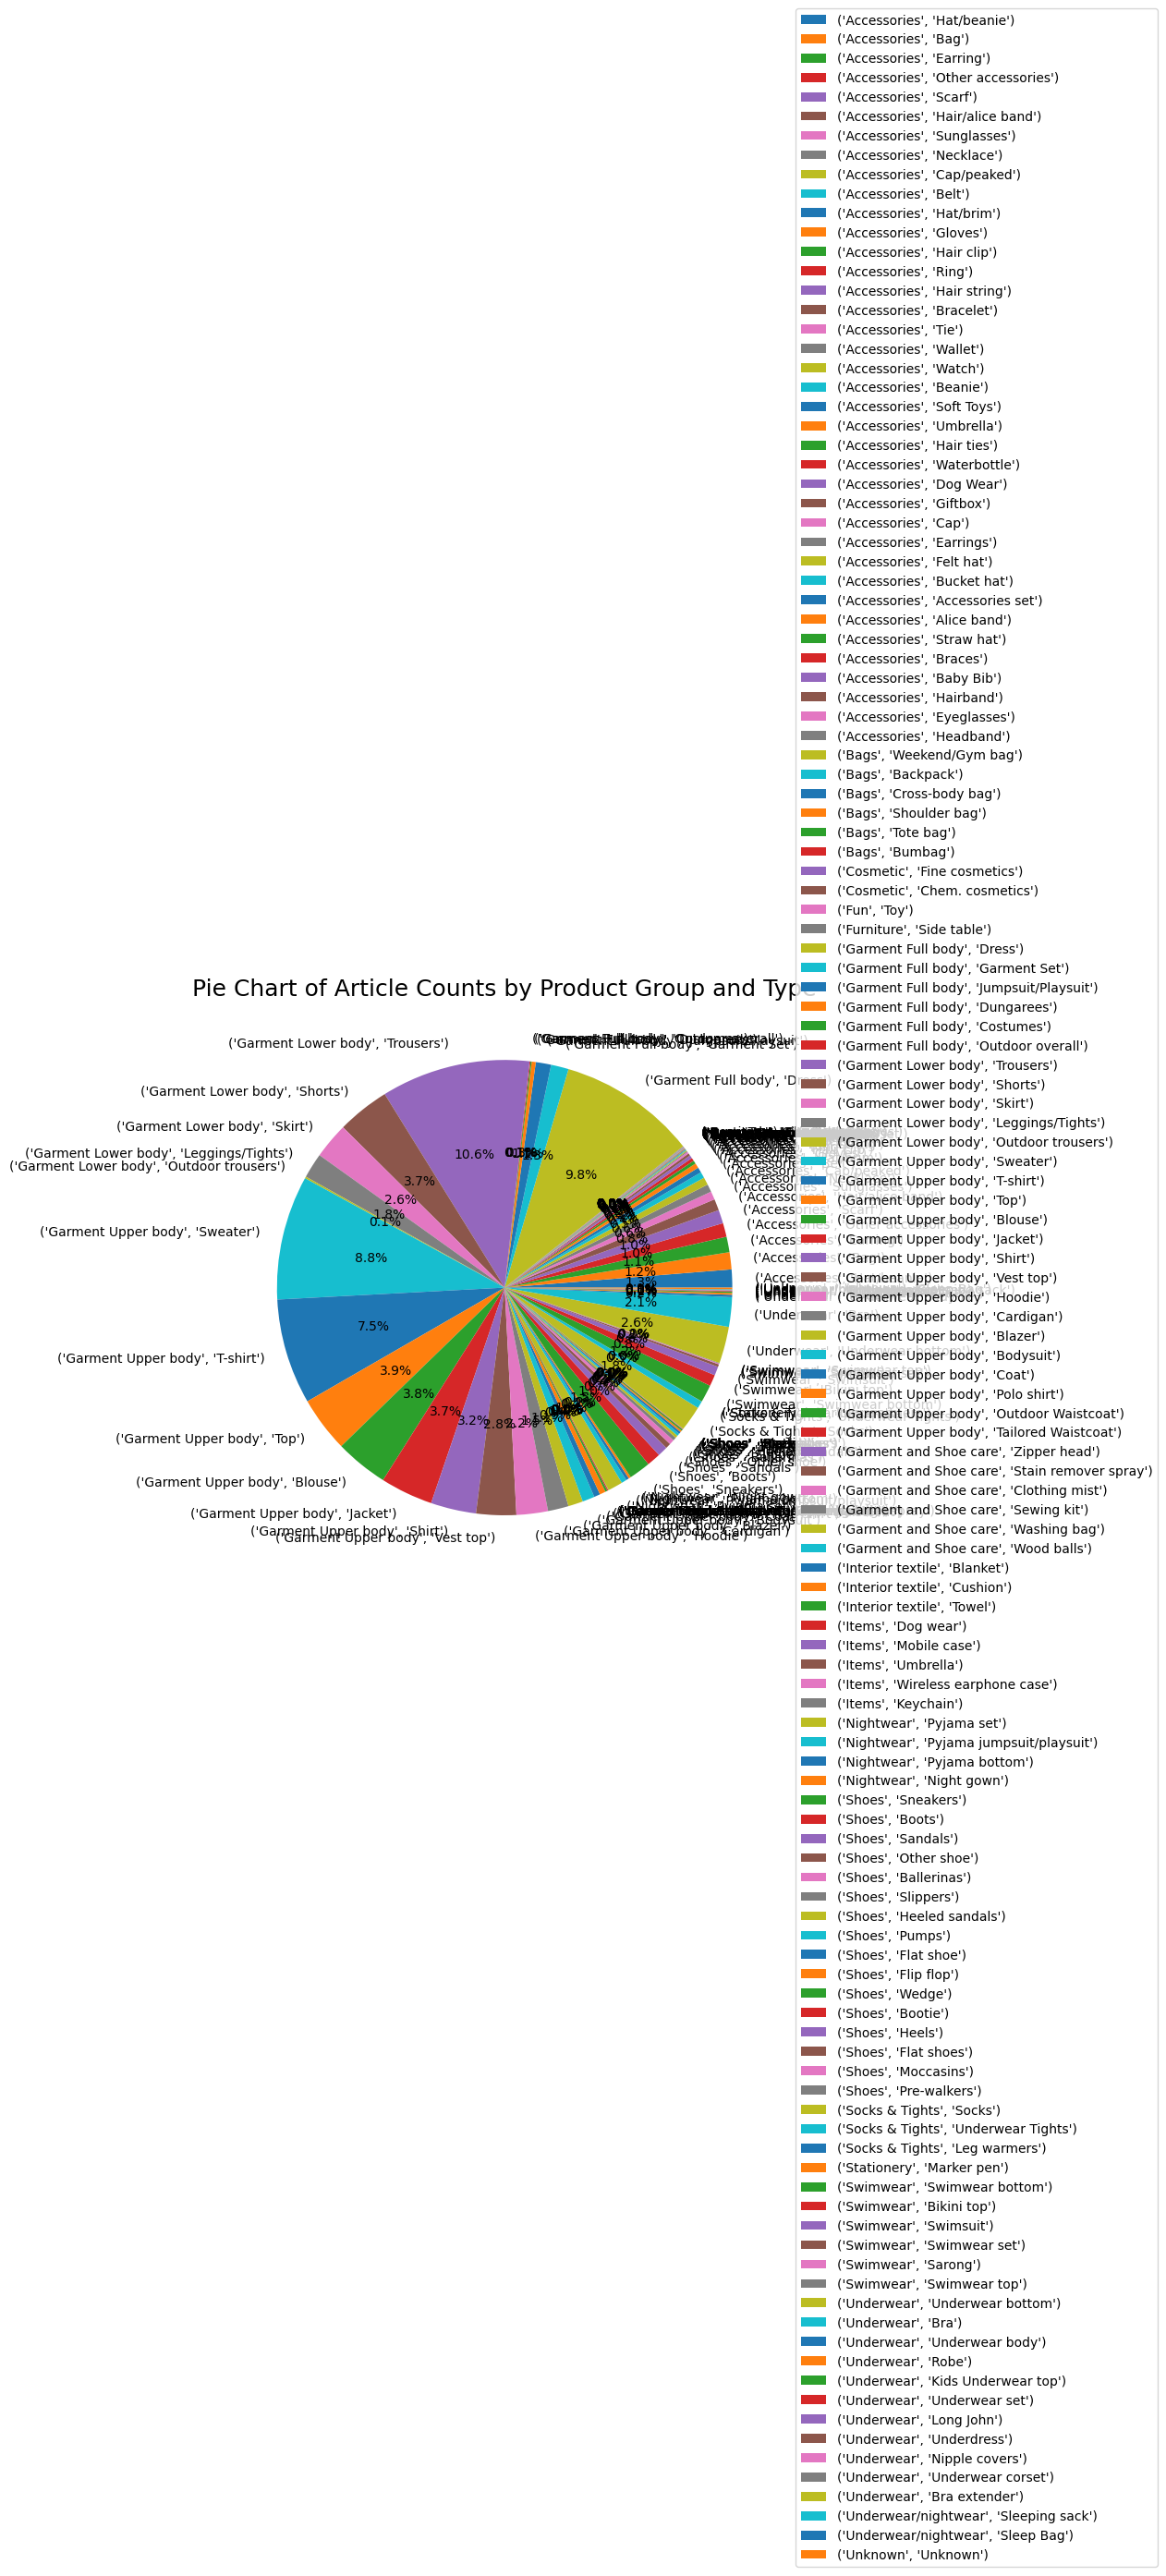

In [49]:

# Group by 'product_group_name' and 'product_type_name' and count 'article_id'
counts = articles_df.groupby(['product_group_name', 'product_type_name'])['article_id'].count()

# Sort within each main group
sorted_counts = counts.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sorted_counts, labels=sorted_counts.index, autopct='%1.1f%%')

# Add legends to the side of the pie chart
ax.legend(sorted_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the default 'ylabel' that appears in the chart
ax.set_ylabel('')

# Set the title of the chart
plt.title('Pie Chart of Article Counts by Product Group and Type', size=18)

# Display the chart
plt.show()


In [61]:
#from matplotlib import ticker
import seaborn as sns
import matplotlib.ticker as ticker

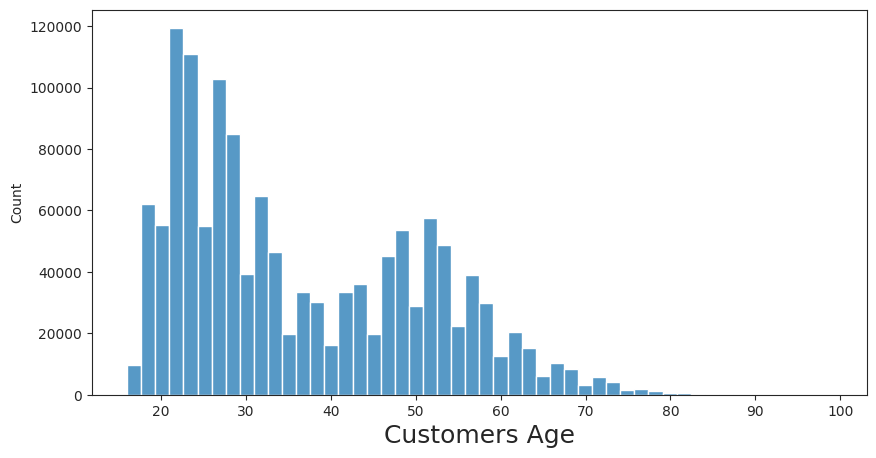

In [56]:
#sns.set_style("ticks")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers_df, x='age', bins=50) #, color= colors)
ax.set_xlabel('Customers Age', size = 18)

# Set x-axis label format for every 10 years
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
non_zero_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('No of Articles by Category', size = 18)
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# Analyzing the activity of the users.
#customers_df["Active"] = customers_df["Active"].fillna(0)
plt.figure(figsize=(10, 6))
plt.title("Inactive/Active (0/1) Users", size = 18)
customers_df["Active"].plot(kind='hist') # hist()